In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
data1=pd.read_excel("Credit Banking_Project - 1.xls",sheet_name='Customer Acqusition')
data2=pd.read_excel("Credit Banking_Project - 1.xls",sheet_name='Spend')
data3=pd.read_excel("Credit Banking_Project - 1.xls",sheet_name='Repayment')

In [77]:
data2['Customer']= data2['Costomer']
data3['Customer']=data3['Costomer']
data2.drop('Costomer',axis=1,inplace=True)
data3.drop('Costomer',axis=1,inplace=True)

### Sanity Check:

In [79]:
data1[data1['Age']<18].shape                   #their are 22 rows with age less than 18 year

(22, 8)

In [7]:
f_data1=data1[data1['Age']>18]

<Axes: xlabel='Age', ylabel='Count'>

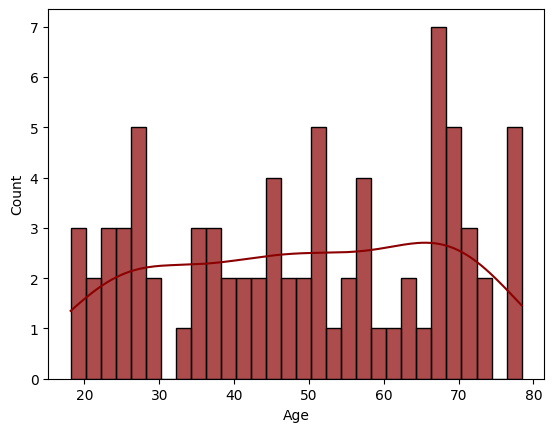

In [8]:
sns.histplot(f_data1['Age'],kde=True,color='darkred',bins=30,alpha=0.7)             #data is not distributed uniformly

<Axes: xlabel='Age', ylabel='Count'>

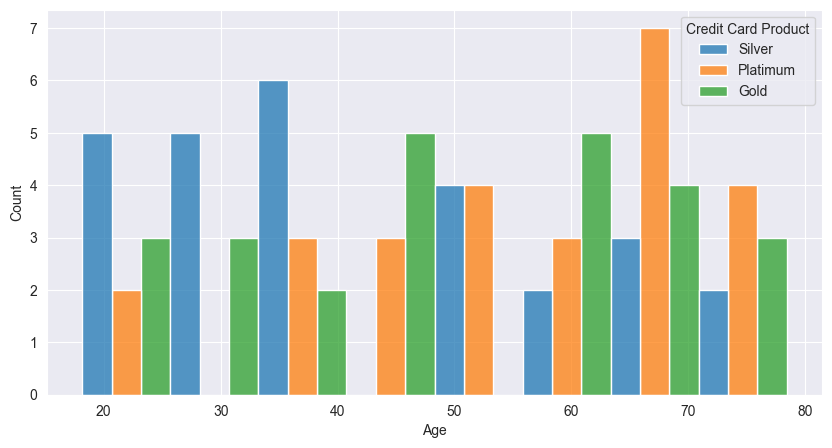

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.histplot(x='Age',hue='Credit Card Product',multiple="dodge",data=f_data1)

<Axes: xlabel='Credit Card Product', ylabel='Age'>

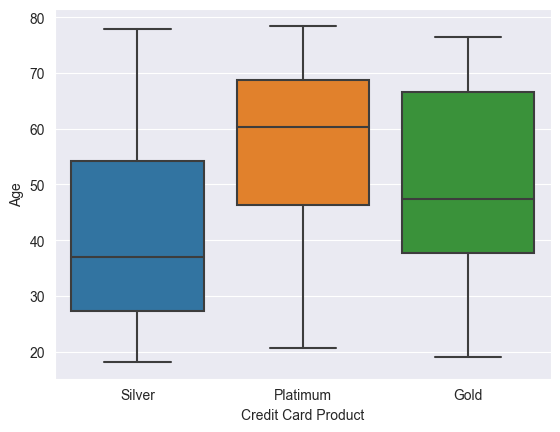

In [10]:
sns.boxplot(x='Credit Card Product',y='Age',data=f_data1)

#### Replacing age less than 18 with median value of age wrt to credit card product category

In [11]:
gold_data=f_data1[f_data1['Credit Card Product']=='Gold']
silver_data=f_data1[f_data1['Credit Card Product']=='Silver']
plt_data=f_data1[f_data1['Credit Card Product']=='Platimum']

In [12]:
np.median(gold_data['Age'])

47.31015863888708

In [13]:
np.median(silver_data['Age'])

36.92277268923775

In [14]:
np.median(plt_data['Age'])

60.241359299655656

In [15]:
def impute_age(row):
    Age = row[0]
    CreditCardProduct= row[1]
    
    if Age<18:

        if CreditCardProduct == 'Gold':
            return 47

        elif CreditCardProduct == 'Silver':
            return 37

        else:
            return 60

    else:
        return Age


In [16]:
data1['Age']=data1[['Age','Credit Card Product']].apply(impute_age,axis=1)

In [17]:
data1[data1['Age']<18]                                       # successfully replaced the age less than 18 yrs

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment


### Dividing and modifying data for analysis

In [18]:
#dividing data on the basis of Month and Year
data2['Y'] = pd.DatetimeIndex(data2['Month']).year
data2['M']=data2['Month'].dt.month_name()
data3['Y']=pd.DatetimeIndex(data3['Month']).year
data3['M']=data3['Month'].dt.month_name()

In [19]:
#dividing data on the basis of 3 years i.e 2004,2005,2006
data2_2004=data2[data2['Y']==2004]
data2_2005=data2[data2['Y']==2005]
data2_2006=data2[data2['Y']==2006]
data3_2004=data3[data3['Y']==2004]
data3_2005=data3[data3['Y']==2005]
data3_2006=data3[data3['Y']==2006]

In [20]:
#grouping data2(spend data) and 3(repayment data)for different years on the basis of different months and customers
data2_2004_grouped=data2_2004.groupby(['Customer','M'])['Amount'].sum().reset_index()
data2_2005_grouped=data2_2005.groupby(['Customer','M'])['Amount'].sum().reset_index()
data2_2006_grouped=data2_2006.groupby(['Customer','M'])['Amount'].sum().reset_index()
data3_2004_grouped=data3_2004.groupby(['Customer','M'])['Amount'].sum().reset_index()
data3_2005_grouped=data3_2005.groupby(['Customer','M'])['Amount'].sum().reset_index()
data3_2006_grouped=data3_2006.groupby(['Customer','M'])['Amount'].sum().reset_index()

In [21]:
# merging the grouped data2(spend data) and 3(repayment data) with data1(customer acquistion)
data2_2004_merge=pd.merge(data2_2004_grouped,data1,how='inner',on='Customer')
data2_2005_merge=pd.merge(data2_2005_grouped,data1,how='inner',on='Customer')
data2_2006_merge=pd.merge(data2_2006_grouped,data1,how='inner',on='Customer')
data3_2004_merge=pd.merge(data3_2004_grouped,data1,how='inner',on='Customer')
data3_2005_merge=pd.merge(data3_2005_grouped,data1,how='inner',on='Customer')
data3_2006_merge=pd.merge(data3_2006_grouped,data1,how='inner',on='Customer')

##### Is there any customer who have spent more than his/her Credit Limit for any particular month.

In [22]:
data2_2004_merge[data2_2004_merge['Limit']<data2_2004_merge['Amount']].sort_values(by=['M','Customer'],ascending=False)

,Customer,M,Amount,Sl No:,Age,City,Credit Card Product,Limit,Company,Segment
168,A9,September,324844.693102,9,18.158058,CHENNAI,Silver,100003,C9,Govt
115,A47,September,283046.738423,47,58.078266,CHENNAI,Platimum,10000,C9,Normal Salary
72,A33,September,337923.352046,33,47.599864,BOMBAY,Platimum,10002,C15,Salaried_MNC
49,A24,September,378056.026925,24,72.647366,DELHI,Silver,100002,C6,Salaried_Pvt
38,A21,September,213571.765566,21,40.552379,COCHIN,Platimum,10002,C21,Normal Salary
...,...,...,...,...,...,...,...,...,...,...
58,A28,April,514999.510621,28,71.009481,TRIVANDRUM,Gold,500000,C10,Salaried_MNC
50,A25,April,241890.058178,25,29.575607,COCHIN,Silver,100003,C7,Govt
43,A23,April,644108.066843,23,51.385111,BANGALORE,Silver,100001,C5,Salaried_MNC
35,A21,April,659456.374912,21,40.552379,COCHIN,Platimum,10002,C21,Normal Salary


In [23]:
data2_2005_merge[data2_2005_merge['Limit']<data2_2005_merge['Amount']].sort_values(by=['M','Customer'],ascending=False)

,Customer,M,Amount,Sl No:,Age,City,Credit Card Product,Limit,Company,Segment
264,A58,September,157449.350924,58,25.508614,CALCUTTA,Silver,100002,C20,Normal Salary
231,A51,September,135145.649167,51,51.443471,BOMBAY,Platimum,100001,C13,Govt
227,A50,September,461199.527487,50,67.883059,COCHIN,Platimum,100000,C12,Salaried_Pvt
219,A49,September,10872.271465,49,66.823836,CALCUTTA,Platimum,10002,C11,Salaried_MNC
139,A36,September,168870.506230,36,68.895871,BOMBAY,Platimum,100002,C18,Normal Salary
...,...,...,...,...,...,...,...,...,...,...
81,A24,April,561654.328582,24,72.647366,DELHI,Silver,100002,C6,Salaried_Pvt
70,A22,April,151043.199724,22,36.922773,BOMBAY,Silver,100000,C22,Self Employed
63,A21,April,122290.001941,21,40.552379,COCHIN,Platimum,10002,C21,Normal Salary
50,A19,April,484196.006058,19,60.000000,BANGALORE,Platimum,10000,C19,Salaried_Pvt


In [24]:
data2_2006_merge[data2_2006_merge['Limit']<data2_2006_merge['Amount']].sort_values(by=['M','Customer'],ascending=False)

,Customer,M,Amount,Sl No:,Age,City,Credit Card Product,Limit,Company,Segment
271,A60,September,520179.542787,60,74.001370,CALCUTTA,Gold,500000,C22,Salaried_Pvt
206,A48,September,75852.524501,48,78.142604,TRIVANDRUM,Platimum,10001,C10,Self Employed
85,A25,September,215664.823823,25,29.575607,COCHIN,Silver,100003,C7,Govt
47,A18,September,347293.540274,18,27.399893,BANGALORE,Silver,100000,C18,Salaried_MNC
278,A61,October,803767.844826,61,44.227930,COCHIN,Gold,500000,C23,Govt
...,...,...,...,...,...,...,...,...,...,...
60,A21,April,449160.558663,21,40.552379,COCHIN,Platimum,10002,C21,Normal Salary
56,A20,April,177517.144895,20,45.650573,CALCUTTA,Platimum,10001,C20,Govt
52,A2,April,126060.878523,2,35.534551,CALCUTTA,Silver,100000,C2,Salaried_MNC
17,A13,April,592900.612003,13,40.141127,BANGALORE,Gold,500000,C13,Salaried_MNC


# Tasks

### Monthly spend of each customer.

In [25]:
Monthly_spend_2004=data2_2004.groupby(['Customer','M'])['Amount'].sum().reset_index()
Monthly_spend_2005=data2_2005.groupby(['Customer','M'])['Amount'].sum().reset_index()
Monthly_spend_2006=data2_2006.groupby(['Customer','M'])['Amount'].sum().reset_index()

### Monthly repayment of each customer.

In [26]:
Monthly_repayment_2004=data3_2004.groupby(['Customer','M'])['Amount'].sum().reset_index()
Monthly_repayment_2005=data3_2005.groupby(['Customer','M'])['Amount'].sum().reset_index()
Monthly_repayment_2006=data3_2006.groupby(['Customer','M'])['Amount'].sum().reset_index()

### Highest paying 10 customers. 

In [74]:
highpay_2004=data3_2004.groupby(['Customer','M'])['Amount'].sum().reset_index().sort_values(by='Amount',ascending=False)
highpay_2005=data3_2004.groupby(['Customer','M'])['Amount'].sum().reset_index().sort_values(by='Amount',ascending=False)
highpay_2006=data3_2004.groupby(['Customer','M'])['Amount'].sum().reset_index().sort_values(by='Amount',ascending=False)

with pd.ExcelWriter('Results.xlsx') as writer:
    highpay_2004.to_excel(writer,sheet_name='Highpay2004')
    highpay_2005.to_excel(writer,sheet_name='Highpay2005')
    highpay_2006.to_excel(writer,sheet_name='Highpay2006')

### Which age group is spending more money?

#### For year 2004

In [88]:
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-25','26-35' ,'36-45', '46-55','56-65','66-75']
data2_2004_merge['Age_grp'] = pd.cut(data2_2004_merge['Age'], bins=bins, labels=labels, right=False)

In [89]:
# Step 5: Aggregate Spending by Age Group
age_group_spending_2004 =data2_2004_merge.groupby(['Age_grp','M'])['Amount'].sum().reset_index()

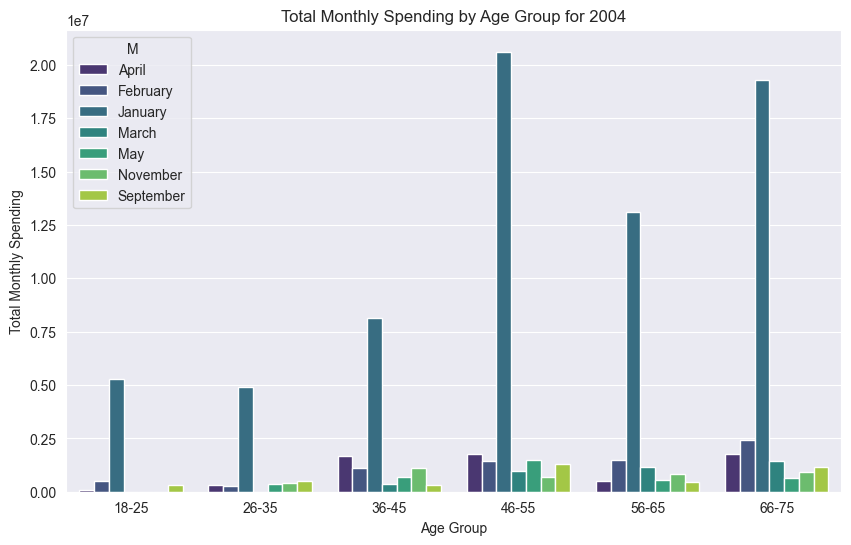

In [90]:
# Step 6: Visualize the Results
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_grp', y='Amount',hue='M',data=age_group_spending_2004, palette='viridis')
plt.title('Total Monthly Spending by Age Group for 2004')
plt.xlabel('Age Group')
plt.ylabel('Total Monthly Spending')
plt.show()

##### For Year 2005

In [91]:
data2_2005_upd=data2_2005[['Customer','Amount','M']]
data2_2005_grouped=data2_2005_upd.groupby(['Customer','M']).sum().reset_index()

In [92]:
data2_2005_merge=pd.merge(data2_2005_grouped,data1,how='inner',on='Customer')

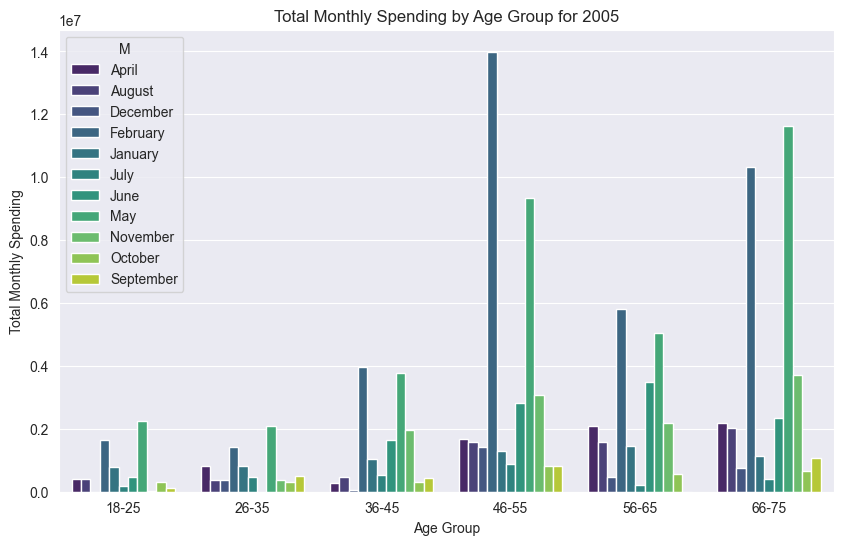

In [93]:
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-25','26-35' ,'36-45', '46-55','56-65','66-75']
data2_2005_merge['Age_grp'] = pd.cut(data2_2005_merge['Age'], bins=bins, labels=labels, right=False)
# Step 5: Aggregate Spending by Age Group
age_group_spending_2005=data2_2005_merge.groupby(['Age_grp','M'])['Amount'].sum().reset_index()
# Step 6: Visualize the Results
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_grp', y='Amount',hue='M',data=age_group_spending_2005, palette='viridis')
plt.title('Total Monthly Spending by Age Group for 2005')
plt.xlabel('Age Group')
plt.ylabel('Total Monthly Spending')
plt.show()

#### For year 2006

In [94]:
data2_2006_upd=data2_2006[['Customer','Amount','M']]
data2_2006_grouped=data2_2006_upd.groupby(['Customer','M']).sum().reset_index()

In [95]:
data2_2006_merge=pd.merge(data2_2006_grouped,data1,how='inner',on='Customer')

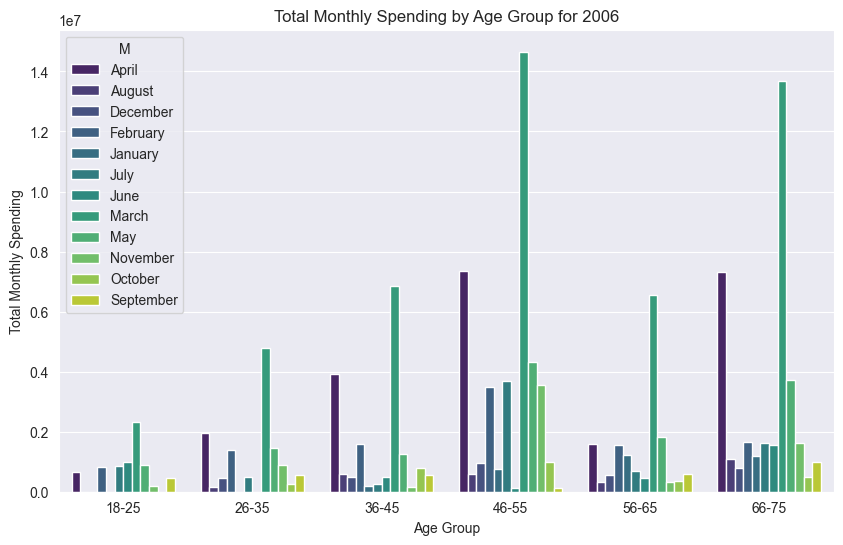

In [96]:
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-25','26-35' ,'36-45', '46-55','56-65','66-75']
data2_2006_merge['Age_grp'] = pd.cut(data2_2006_merge['Age'], bins=bins, labels=labels, right=False)
# Step 5: Aggregate Spending by Age Group
age_group_spending_2006=data2_2006_merge.groupby(['Age_grp','M'])['Amount'].sum().reset_index()
# Step 6: Visualize the Results
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_grp', y='Amount',hue='M',data=age_group_spending_2006, palette='viridis')
plt.title('Total Monthly Spending by Age Group for 2006')
plt.xlabel('Age Group')
plt.ylabel('Total Monthly Spending')
plt.show()

### Which is the most profitable segment? 

In [97]:
data3_2004_upd=data3_2004[['Customer','Amount','M']]
data3_2004_grouped=data3_2004_upd.groupby(['Customer','M']).sum().reset_index()
data3_2005_upd=data3_2005[['Customer','Amount','M']]
data3_2005_grouped=data3_2005_upd.groupby(['Customer','M']).sum().reset_index()
data3_2006_upd=data3_2006[['Customer','Amount','M']]
data3_2006_grouped=data3_2006_upd.groupby(['Customer','M']).sum().reset_index()

#### For year 2004

In [98]:
data2_3_merge_2004=pd.merge(data3_2004_grouped,data2_2004_grouped,how='inner',on=['Customer','M'])
data2_3_merge_2004.rename(columns = {'Amount_x':'Repayment', 'Amount_y':'Spent'}, inplace = True)
data2_3_merge_2004['due']=data2_3_merge_2004['Spent']-data2_3_merge_2004['Repayment']

In [99]:
def balance(row):
    X=row[0]
    if X>0:
        return (X+X*2.9)
    else:
        return abs(X)

In [100]:
data2_3_merge_2004['Net_profit']=data2_3_merge_2004[['due']].apply(balance,axis=1)

Text(0.5, 1.0, 'Segment-Wise most profitable customer 2004')

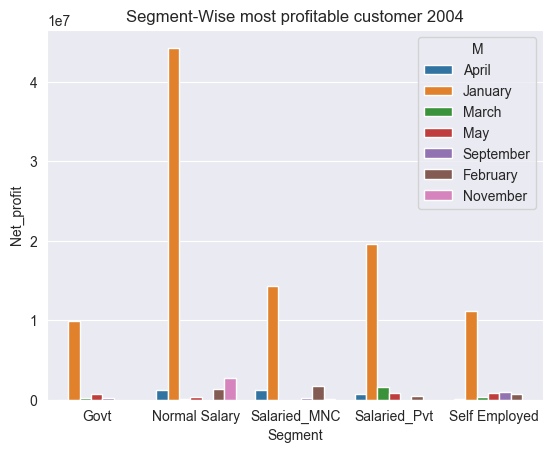

In [101]:
data1_2_3_merge_2004=pd.merge(data2_3_merge_2004,data1,how='inner',on='Customer')
data1_2_3_grouped_2004=data1_2_3_merge_2004.groupby(['Segment','M'])['Net_profit'].sum().reset_index()
sns.barplot(x='Segment',y='Net_profit',hue='M',data=data1_2_3_grouped_2004)
plt.title('Segment-Wise most profitable customer 2004')

#### for 2005

In [102]:
data2_3_merge_2005=pd.merge(data3_2005_grouped,data2_2005_grouped,how='inner',on=['Customer','M'])
data2_3_merge_2005.rename(columns = {'Amount_x':'Repayment', 'Amount_y':'Spent'}, inplace = True)
data2_3_merge_2005['due']=data2_3_merge_2005['Spent']-data2_3_merge_2005['Repayment']
data2_3_merge_2005['Net_profit']=data2_3_merge_2005[['due']].apply(balance,axis=1)

Text(0.5, 1.0, 'Segment-Wise most profitable customer 2005')

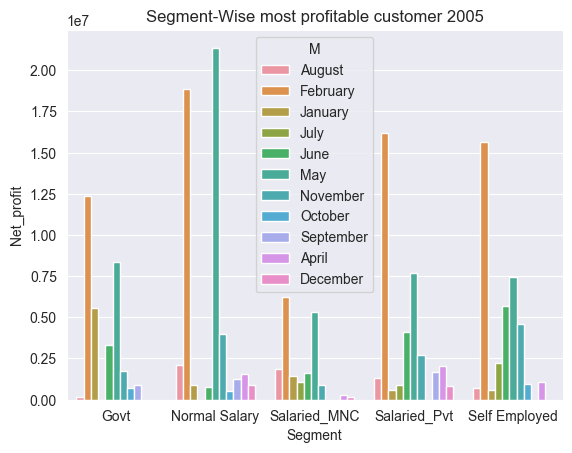

In [103]:
data1_2_3_merge_2005=pd.merge(data2_3_merge_2005,data1,how='inner',on='Customer')
data1_2_3_grouped_2005=data1_2_3_merge_2005.groupby(['Segment','M'])['Net_profit'].sum().reset_index()
sns.barplot(x='Segment',y='Net_profit',hue='M',data=data1_2_3_grouped_2005)
plt.title('Segment-Wise most profitable customer 2005')

#### For 2006

In [104]:
data2_3_merge_2006=pd.merge(data3_2006_grouped,data2_2006_grouped,how='inner',on=['Customer','M'])
data2_3_merge_2006.rename(columns = {'Amount_x':'Repayment', 'Amount_y':'Spent'}, inplace = True)
data2_3_merge_2006['due']=data2_3_merge_2006['Spent']-data2_3_merge_2006['Repayment']
data2_3_merge_2006['Net_profit']=data2_3_merge_2006[['due']].apply(balance,axis=1)

Text(0.5, 1.0, 'Segment-Wise most profitable customer 2006')

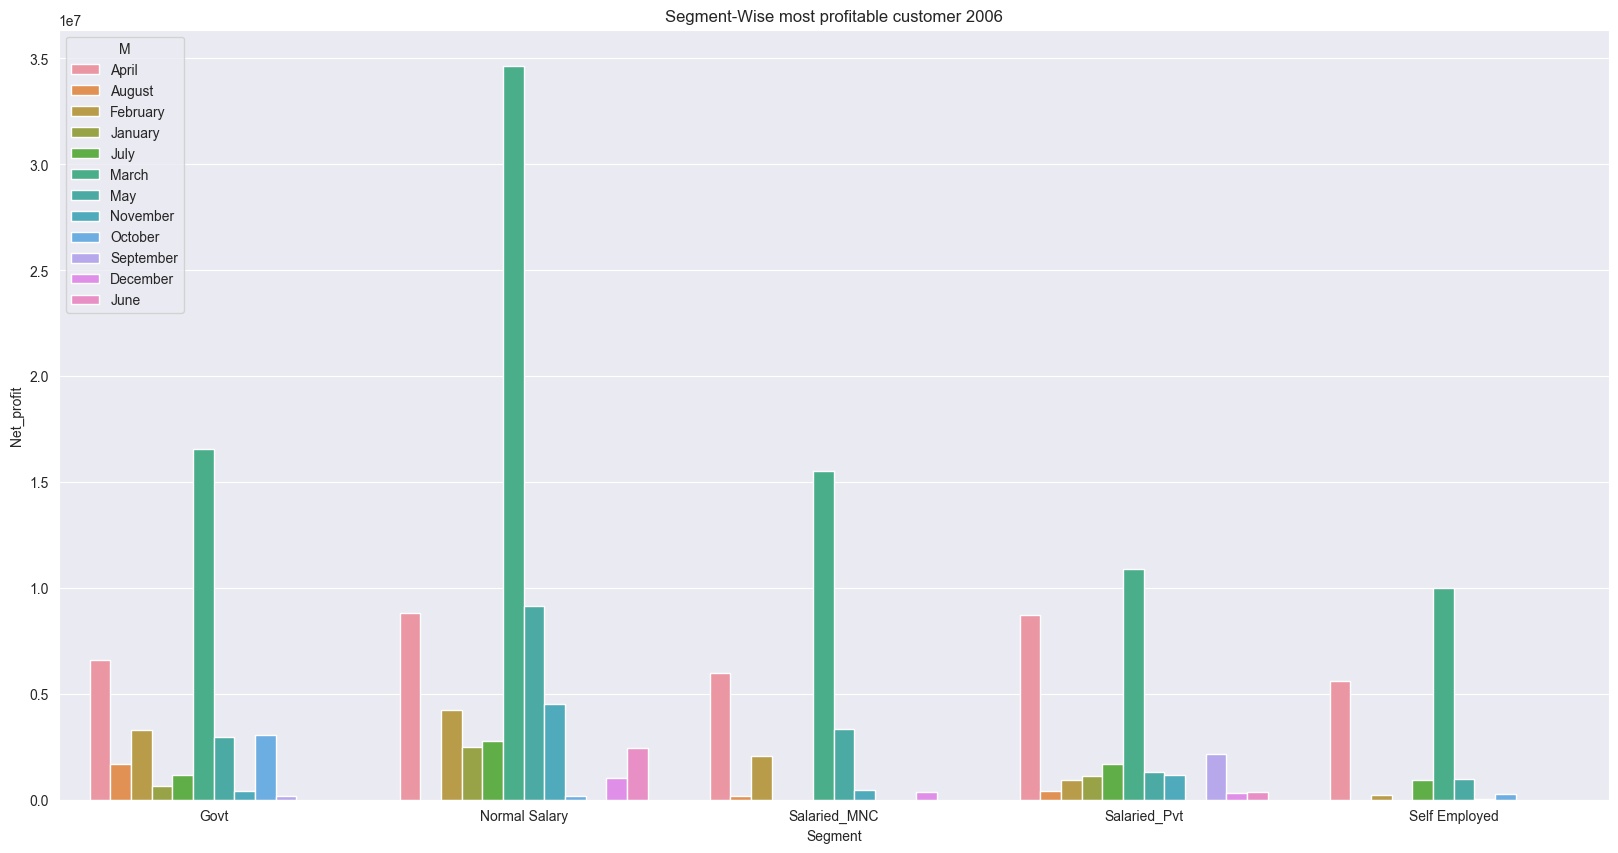

In [105]:
data1_2_3_merge_2006=pd.merge(data2_3_merge_2006,data1,how='inner',on='Customer')
data1_2_3_grouped_2006=data1_2_3_merge_2006.groupby(['Segment','M'])['Net_profit'].sum().reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x='Segment',y='Net_profit',hue='M',data=data1_2_3_grouped_2006)
plt.title('Segment-Wise most profitable customer 2006')

### Monthly profit for the bank. 

#### For 2004

Text(0.5, 1.0, 'Monthly profit for the bank 2004')

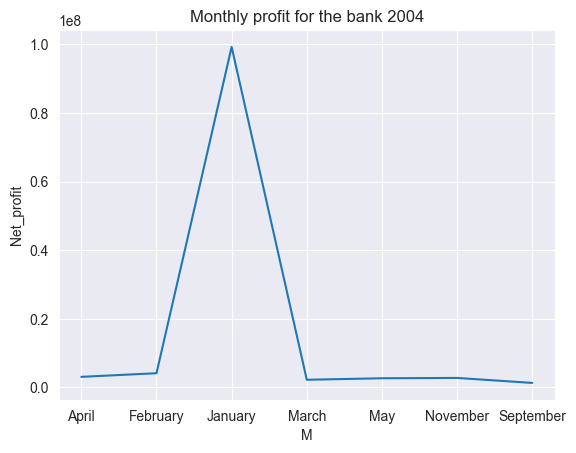

In [106]:
MonthlyProfit_2004=data2_3_merge_2004.groupby('M')['Net_profit'].sum().reset_index()
sns.lineplot(x='M',y='Net_profit',data=MonthlyProfit_2004)
plt.title('Monthly profit for the bank 2004')

#### For 2005

Text(0.5, 1.0, 'Monthly profit for the bank 2005')

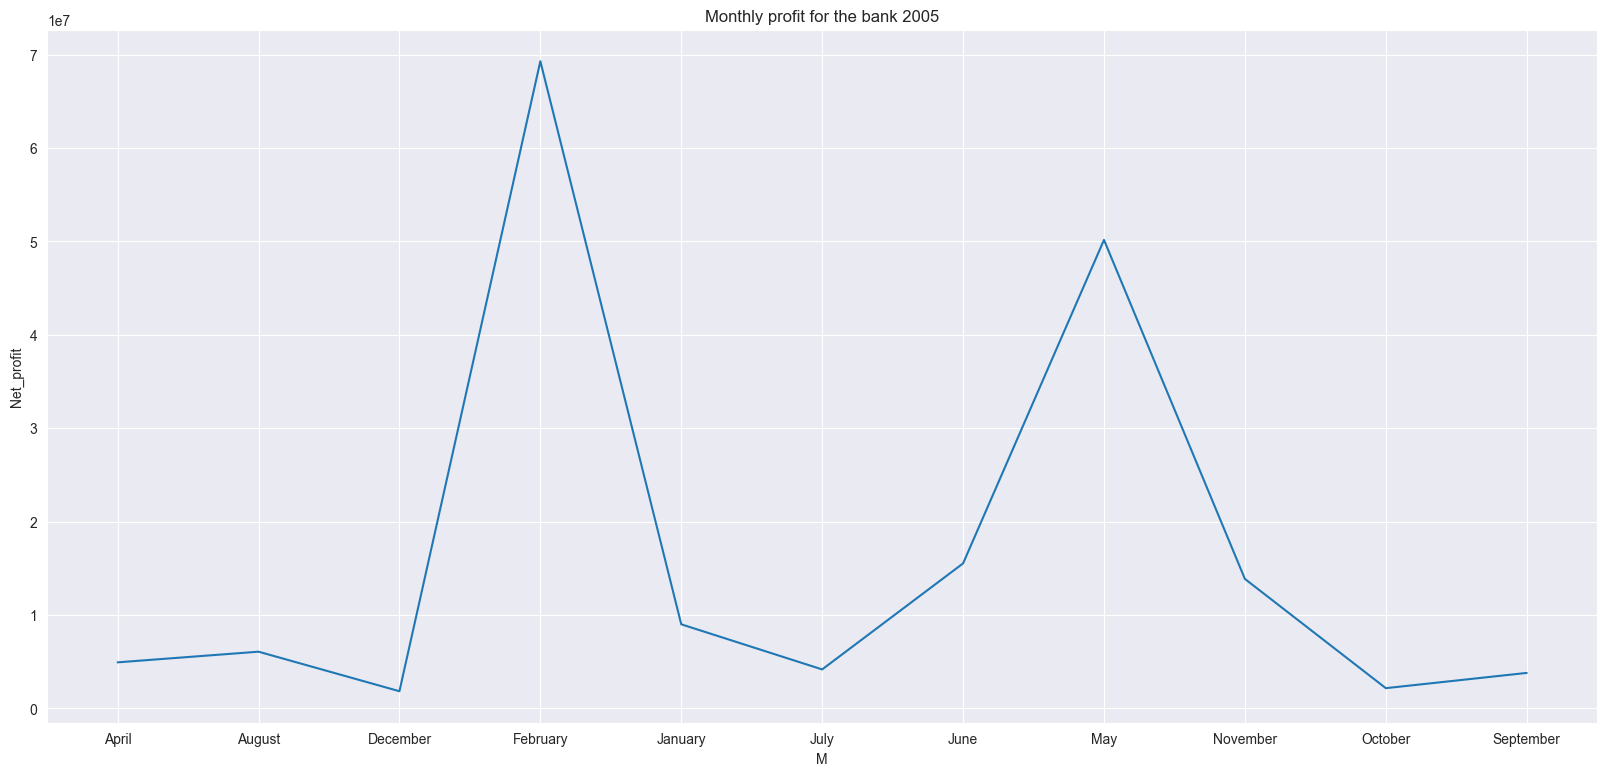

In [107]:
MonthlyProfit_2005=data2_3_merge_2005.groupby('M')['Net_profit'].sum().reset_index()
plt.figure(figsize=(20,9))
sns.lineplot(x='M',y='Net_profit',data=MonthlyProfit_2005)
plt.title('Monthly profit for the bank 2005')

#### For 2006

Text(0.5, 1.0, 'Monthly profit for the bank 2006')

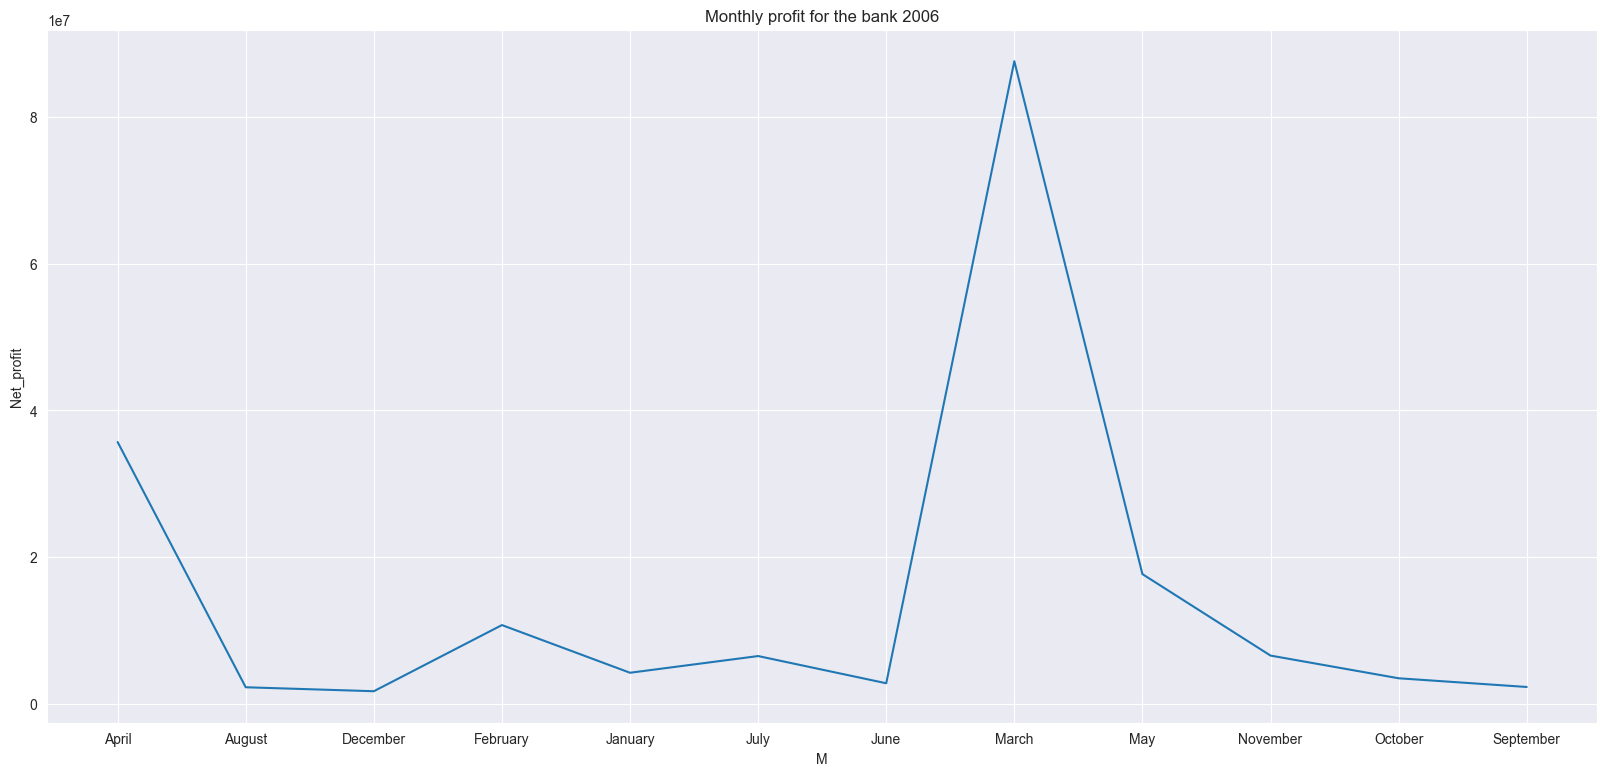

In [108]:
MonthlyProfit_2006=data2_3_merge_2006.groupby('M')['Net_profit'].sum().reset_index()
plt.figure(figsize=(20,9))
sns.lineplot(x='M',y='Net_profit',data=MonthlyProfit_2006)
plt.title('Monthly profit for the bank 2006')

### In which category the customers are spending more money? 

#### For 2004

Text(0.5, 1.0, 'Category-Wise spending customer 2004')

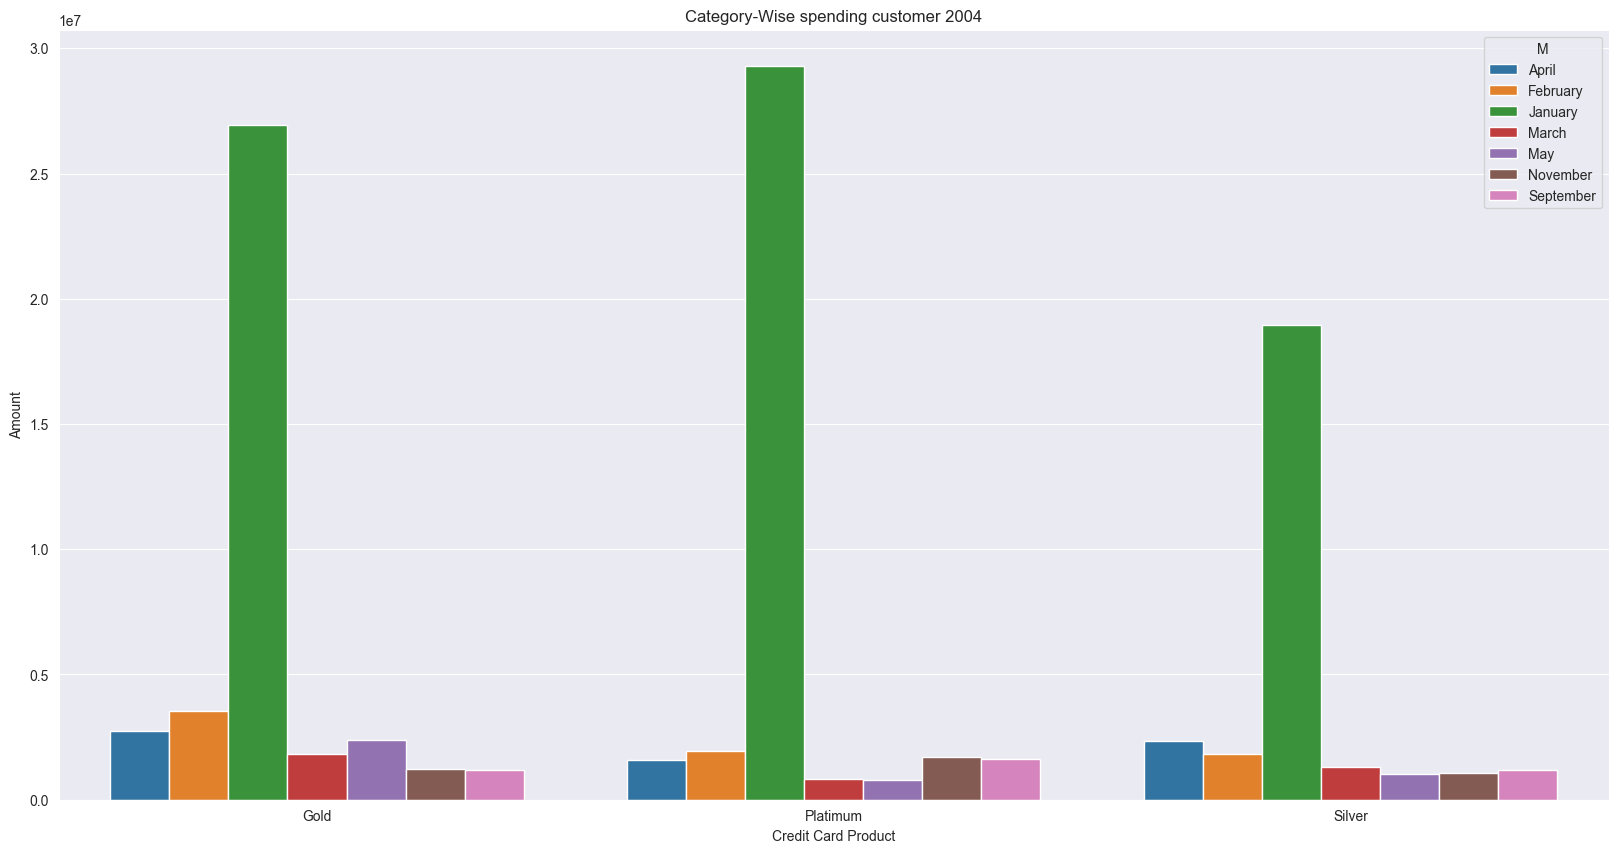

In [109]:
Spending_category2004=data2_2004_merge.groupby(['Credit Card Product','M'])['Amount'].sum().reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x='Credit Card Product',y='Amount',hue='M',data=Spending_category2004)
plt.title('Category-Wise spending customer 2004')

#### For 2005

Text(0.5, 1.0, 'Category-Wise spending customer 2005')

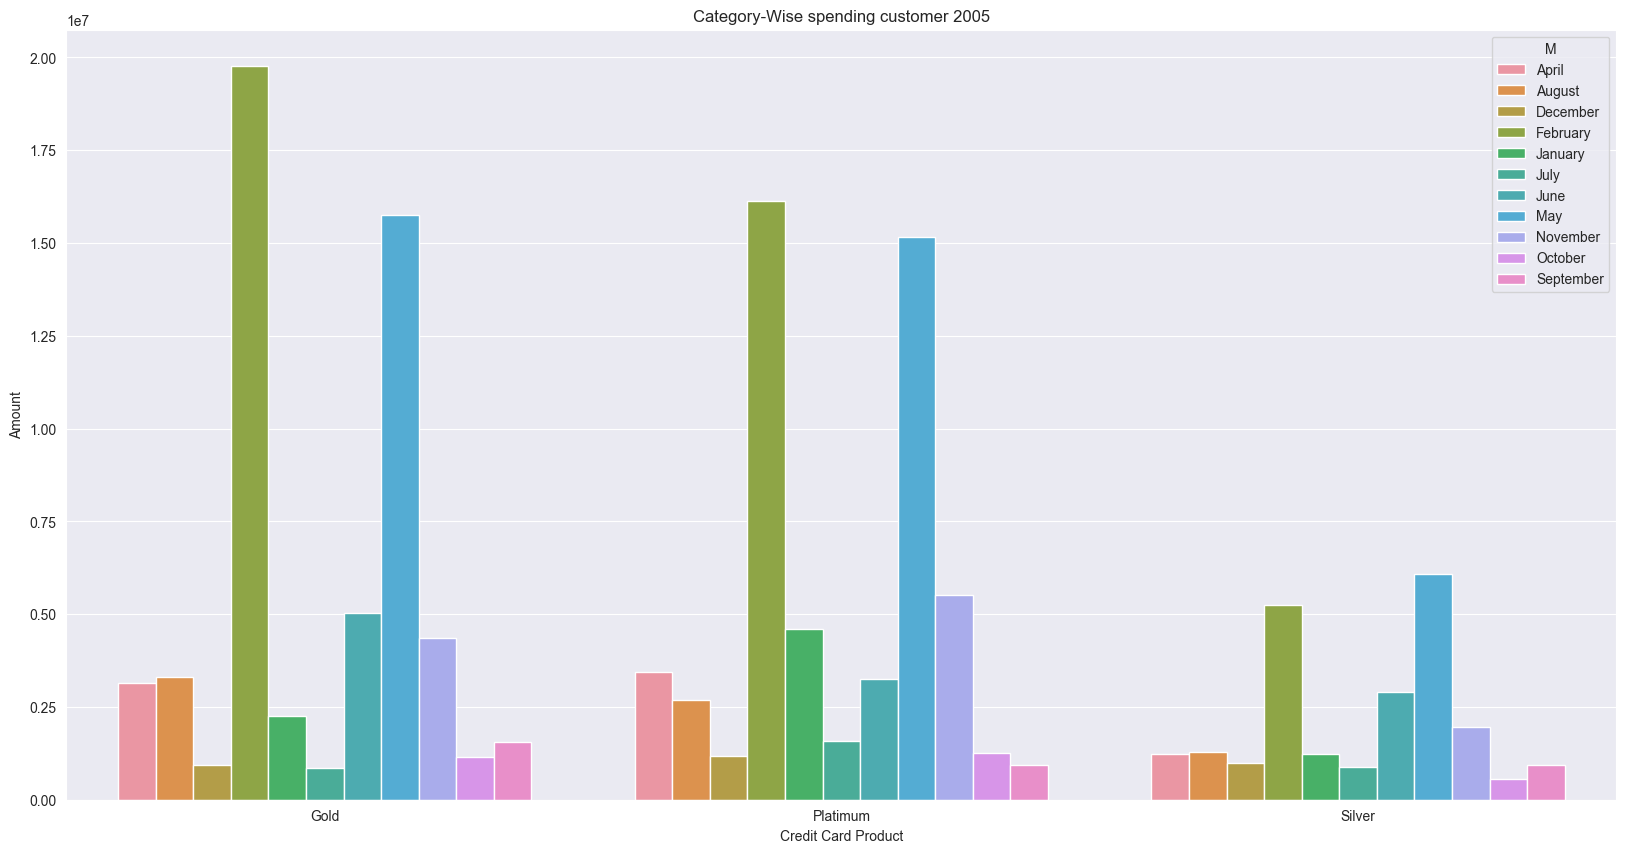

In [110]:
Spending_category2005=data2_2005_merge.groupby(['Credit Card Product','M'])['Amount'].sum().reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x='Credit Card Product',y='Amount',hue='M',data=Spending_category2005)
plt.title('Category-Wise spending customer 2005')

#### For 2006

Text(0.5, 1.0, 'Category-Wise spending customer 2006')

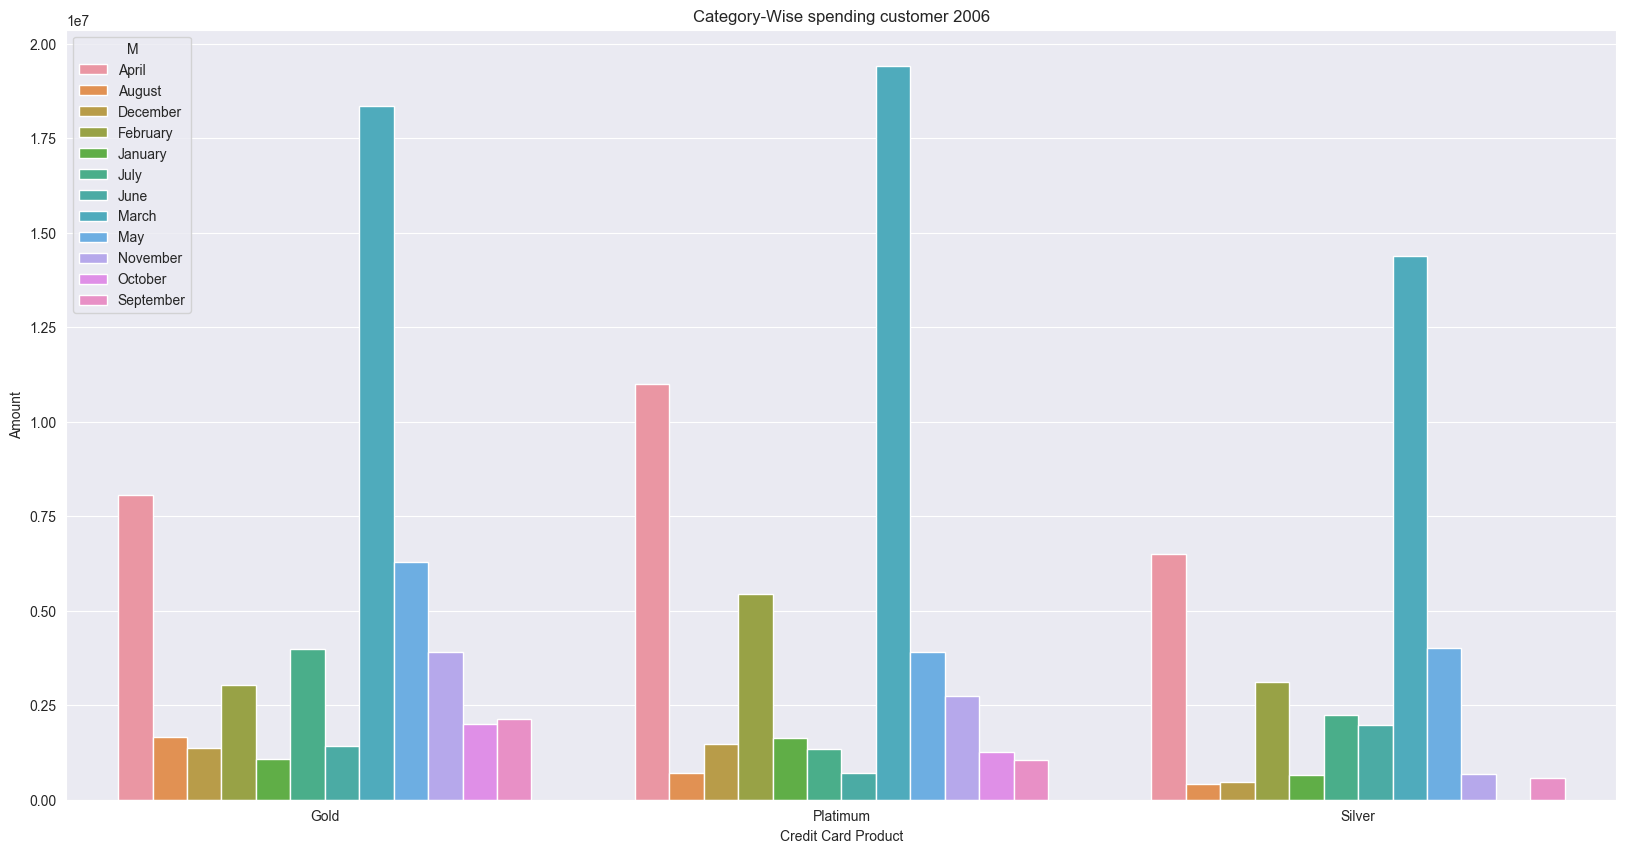

In [111]:
Spending_category2006=data2_2006_merge.groupby(['Credit Card Product','M'])['Amount'].sum().reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x='Credit Card Product',y='Amount',hue='M',data=Spending_category2006)
plt.title('Category-Wise spending customer 2006')

### People in which segment are spending more money

#### For 2004

Text(0.5, 1.0, 'Segment-wise spending for 2004')

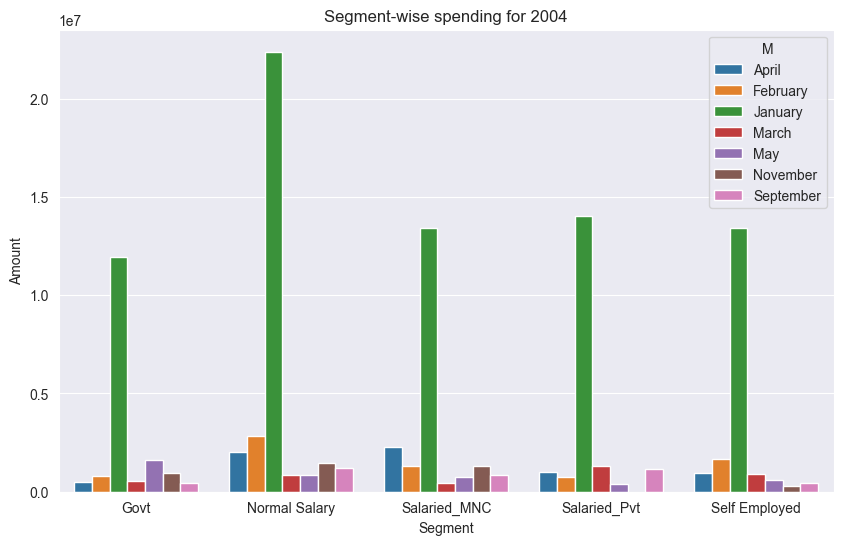

In [113]:
Spending_segment2004=data2_2004_merge.groupby(['Segment','M'])['Amount'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Segment',y='Amount',hue='M',data=Spending_segment2004)
plt.title('Segment-wise spending for 2004')

#### For 2005

Text(0.5, 1.0, 'Segment-wise spending for 2005')

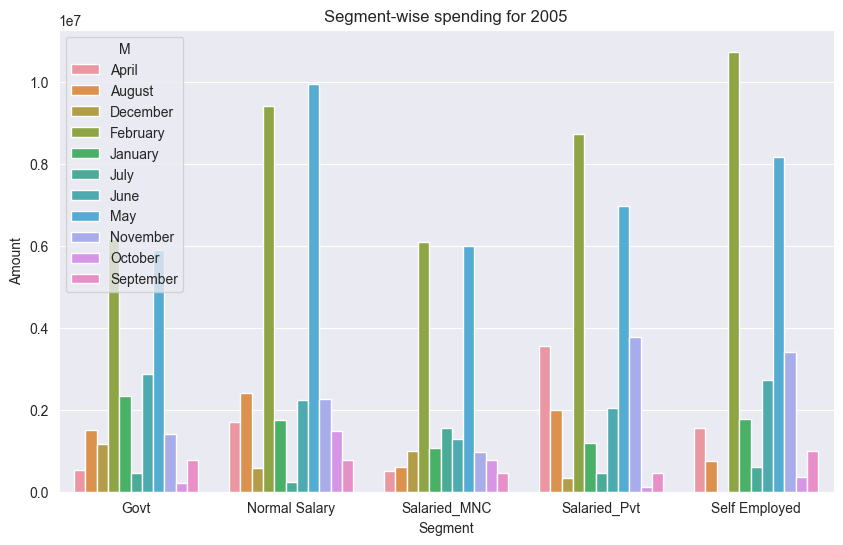

In [114]:
Spending_segment2005=data2_2005_merge.groupby(['Segment','M'])['Amount'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Segment',y='Amount',hue='M',data=Spending_segment2005)
plt.title('Segment-wise spending for 2005')

#### For 2006

Text(0.5, 1.0, 'Segment-wise spending for 2006')

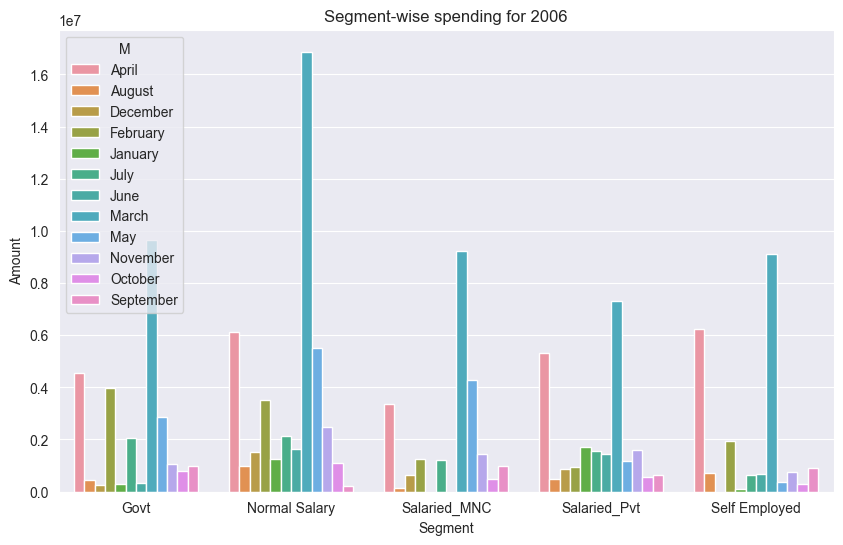

In [115]:
Spending_segment2006=data2_2006_merge.groupby(['Segment','M'])['Amount'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Segment',y='Amount',hue='M',data=Spending_segment2006)
plt.title('Segment-wise spending for 2006')


##### extraction of file
with pd.ExcelWriter('Results.xlsx') as writer:
    Monthly_spend_2004.to_excel(writer,sheet_name='Monthly spent 2004')
    Monthly_spend_2005.to_excel(writer,sheet_name='Monthly spent 2005')
    Monthly_spend_2006.to_excel(writer,sheet_name='Monthly spent 2006')
    Monthly_repayment_2004.to_excel(writer,sheet_name='Monthly repayment 2004')
    Monthly_repayment_2005.to_excel(writer,sheet_name='Monthly repayment 2005')
    Monthly_repayment_2006.to_excel(writer,sheet_name='Monthly repayment 2006')
    Top10.to_excel(writer,sheet_name='10 High Paying Customers')
    MonthlyProfit_2004.to_excel(writer,sheet_name='month prof 2004')
    MonthlyProfit_2005.to_excel(writer,sheet_name='Monthly  2005')
    MonthlyProfit_2006.to_excel(writer,sheet_name='Monthly 2006')